In [130]:
from dotenv import load_dotenv
import os
import re
import pandas as pd
import requests
import json, requests
from folium import Map, Marker, Icon, FeatureGroup, LayerControl, Choropleth
from folium.plugins import HeatMap
from folium.vector_layers import Circle, Polygon

In [ ]:
load_dotenv()

In [ ]:
fs_token = os.getenv("foursquare_KEY")
fs_id = os.getenv("foursquare_ID")

In [ ]:
# kindergarten, airports, bar, discoteques, vegan food, Starbucks, bascketball stadium, dog hairdresser

In [120]:
def query_api(query,place):
    fs_id = os.getenv('foursquare_ID')
    fs_token = os.getenv('foursquare_KEY')
    url = 'https://api.foursquare.com/v2/venues/explore'
    params = dict(
    client_id=fs_id,
    client_secret=fs_token,
    near=place,
    query=query,
    limit=50,
    v='20201115'
    )
    resp = requests.get(url=url, params=params)
    return json.loads(resp.text)

## Airports

In [ ]:
fs_id = os.getenv('foursquare_ID')
fs_token = os.getenv('foursquare_KEY')
url = 'https://api.foursquare.com/v2/venues/explore'
params = dict(
client_id=fs_id,
client_secret=fs_token,
near = "California",
query="airports",
limit=50,
v='20201115'
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)

In [90]:
data.keys()

dict_keys(['meta', 'response'])

In [122]:
airports = [[i['venue']['location']['lat'],i['venue']['location']['lng']] for i in data['response']['groups'][0]['items']]
cities = [i['venue']['location']["city"] for i in data['response']['groups'][0]['items']]

In [123]:
city_airport_lst=[]
for i in range(len(cities)):
        city_airport = {"city":cities[i],"airport":airports[i]}
        city_airport_lst.append(city_airport)

In [124]:
df=pd.DataFrame(city_airport_lst)

In [125]:
df.head(5)

,city,airport
0,Palm Springs,"[33.82316943745962, -116.507594590106]"
1,Long Beach,"[33.81721775280286, -118.14612529298756]"
2,San Diego,"[32.732760354061355, -117.20122208603101]"
3,Sacramento,"[38.6929338703567, -121.58825668247535]"
4,Santa Ana,"[33.678556182437845, -117.86189797028071]"


In [139]:
m = Map(location=[36.739140, -119.790379],zoom_start=4)
for i, row in df.iterrows():
    city = {
        "location":row["airport"],
        "popup":"airport",
        "tooltip":row["city"]
    }

    ic = Icon(color="red",
              prefix="fa",
              icon="plane")
    Marker(**city, icon=ic).add_to(m)

In [140]:
m

## Conclusion

The office should be in one of the following counties:
- Eureka (Humbolt)
- Sacramento
- Oakland (Alameda)
- San Francisco (Los Angeles)
- San Jose (Santa Clara)
- Fresno
- Santa Barbara
- San Diego
- Palm Spring (Riverside)
- Ontario (San Bernardino)
- Santa Ana (Orange)

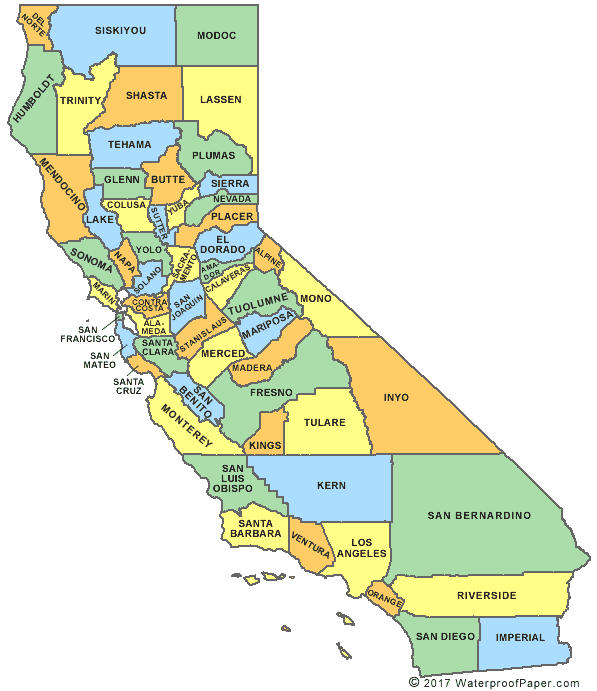


In [ ]:
#<img src="images/content_lightning_bolt_big.jpg" width="400">

## Kindergarten

## Vegan food